In [3]:
import numpy as np
import lmdb,os,sys,math
caffe_root = '/gpu1/adnan/caffe/'  # this file is expected to be in {caffe_root}/examples
sys.path.insert(0, caffe_root + 'python')
import caffe

from pylab import *
%matplotlib inline

At here-

LMDB files are created and stored in LMDB_612

Following files are available-
    
    1. regression_model_train_test.prototxt
    2. regression_model_solver.prototxt
    3. regression_model_train.sh

*in ipython you can view each of these files by executing "!cat filename" 
for example:

        !cat regression_model_train_test.prototxt

Example creating network defination in python.
    
    ref: http://nbviewer.ipython.org/github/BVLC/caffe/blob/master/examples/01-learning-lenet.ipynb

    *used "Digits" to create regression_model_train_test.prototxt
    

In [4]:
# instruction to use gpu zero
caffe.set_device(0) 

#set caffe mode cpu or gpu. check model_solver.prototxt.
caffe.set_mode_gpu()
#caffe.set_mode_cpu()

#create solver
solver = caffe.SGDSolver('regression_model_solver.prototxt')

In [5]:
print "model's layer dimensions"
print "%-10s  --> %-20s"%('Layer name', 'shape')
print
for k,v in solver.net.blobs.items():
    print "%-10s  --> %-20s"%(k, v.data.shape)
    
print """
************************
"""
print "model's convo layer and ip layer's  weight except bias network parameters"
print "%-10s  --> %-20s"%('Layer name', 'shape')
print
for k,v in solver.net.params.items():
    print "%-10s  --> %-20s"%(k, v[0].data.shape)


model's layer dimensions
Layer name  --> shape               

data        --> (1, 3, 640, 640)    
label       --> (1, 1, 1, 1)        
conv1       --> (1, 10, 636, 636)   
pool1       --> (1, 10, 318, 318)   
conv2       --> (1, 10, 314, 314)   
pool2       --> (1, 10, 157, 157)   
ip1         --> (1, 500)            
ip2         --> (1, 1)              
loss        --> ()                  

************************

model's convo layer and ip layer's  weight except bias network parameters
Layer name  --> shape               

conv1       --> (10, 3, 5, 5)       
conv2       --> (10, 10, 5, 5)      
ip1         --> (500, 246490)       
ip2         --> (1, 500)            


In [7]:
'''
test the model for forward
run's a single forward pass
'''
solver.net.forward()
solver.test_nets[0].forward()

{'accuracy': array(1.0, dtype=float32),
 'loss': array(0.15000569820404053, dtype=float32)}

[[[[ 0.55074]]]]


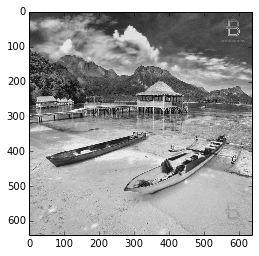

In [11]:
'''
check the data layer's input
'''
print solver.net.blobs['label'].data[:1]
imshow(solver.net.blobs['data'].data[:1,0].transpose(1,0,2).reshape(640,1*640),cmap='gray')


[[[[ 0.61936998]]]]


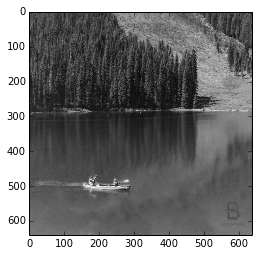

In [12]:
print solver.test_nets[0].blobs['label'].data[:1]
imshow(solver.test_nets[0].blobs['data'].data[:1,0].transpose(1,0,2).reshape(640,1*640),cmap='gray')

In [13]:
solver.step(1)

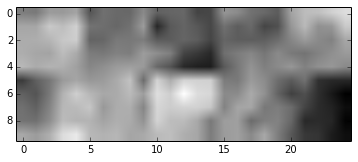

In [32]:
#update in "convlayer"
imshow(solver.net.params['conv1'][0].diff[:,0].reshape(2, 5, 5, 5).transpose(0, 2, 1, 3).reshape(2*5, 5*5), cmap='gray')